In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [4]:
# Load the dataset
df = pd.read_csv('data/Crop_recommendation.csv')
print(df.shape)
df.head()

(2200, 8)


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
print(df.info())
print(df.describe())
print(df['label'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    

In [8]:
X = df.drop('label', axis=1)
y = df['label']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Save the scaler for later use in your web app
joblib.dump(scaler, 'fertilizer_scaler.joblib')

['fertilizer_scaler.joblib']

In [12]:
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [13]:
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        2

In [14]:
joblib.dump(model, 'fertilizer_model.joblib')
print("Model and scaler saved!")

Model and scaler saved!


In [15]:
# Example: N, P, K, temperature, humidity, ph, rainfall
sample = np.array([[90, 42, 43, 20.87, 82.00, 6.50, 202.93]])
sample_scaled = scaler.transform(sample)
prediction = model.predict(sample_scaled)
print("Predicted Crop:", prediction[0])

Predicted Crop: rice


C:\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [16]:
# Example: N, P, K, temperature, humidity, ph, rainfall
sample = np.array([[90, 42, 43, 20.87, 82.00, 6.50, 202.93]])
sample_scaled = scaler.transform(sample)
prediction = model.predict(sample_scaled)
print("Predicted Crop:", prediction[0])

Predicted Crop: rice


C:\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


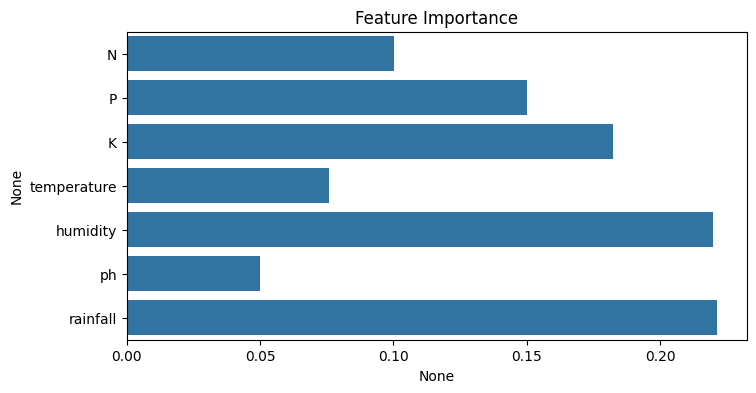

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_importance = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(8,4))
sns.barplot(x=feat_importance, y=feat_importance.index)
plt.title('Feature Importance')
plt.show()